In [189]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [190]:
## load data
df = pd.read_csv(r"code\news\AMZN_20201106.csv")
X = df["content"].values
X.shape
X[0]

"Amazon.com Inc has complained to India's market regulator that its local partner Future Retail Ltd misled shareholders by incorrectly saying it was complying with its contractual obligations to the U.S. e-commerce giant, a letter seen by Reuters shows.  Amazon is locked in a bitter legal dispute with Future Group, which in August sold its retail assets to Mukesh Ambani-led Reliance Industries Ltd for $3.4 billion.  The deal, Amazon alleges, breaches 2019 agreements by Future."

0 618


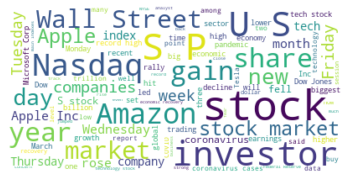

1 107


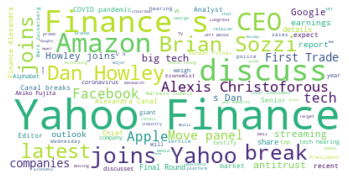

2 60


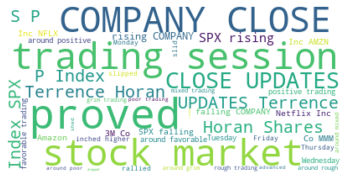

3 1854


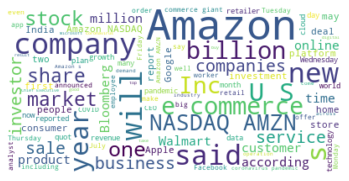

In [191]:
vec = TfidfVectorizer(max_features=2048, stop_words="english")
vec.fit(X)
features = vec.transform(X)
# print(features[0].shape)
n_clusters = 4
cls = KMeans(n_clusters)
cls.fit(features)
x = cls.predict(features)

df = pd.DataFrame(x)
df.insert(df.shape[1], "content", X[df.index])


def to_img(df):
    text = " ".join(i for i in df.content)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(n_clusters):
    # print(df[df[0]==i])
    print(i, df[df[0]==i].shape[0])
    to_img(df[df[0]==i])

In [192]:
# !pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Groupby by class
c = df.groupby(0)

# Summary statistic of all countries
c.describe().head()

content                                                               
    count unique                                                top freq
0                                                                       
0     618    613  Dow Jones futures fell, extending Tuesday's se...    2
1     107    107  Yahoo Finance’s Alexis Christoforous, Brian So...    1
2      60     60  COMPANY CLOSE UPDATES  Terrence Horan Shares o...    1
3    1854   1839  (For a live blog on the U.S. stock market, cli...    7

In [193]:
# def array2df(idxs):
    

In [197]:
# reduce the features to 3D
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features.toarray())
# reduced_features

(2639,)


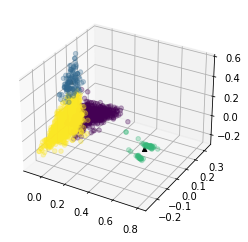

In [195]:
# draw 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cluster_centers = pca.transform(cls.cluster_centers_)
labels = cls.predict(features)
print(labels.shape)

ax.scatter(
    reduced_features[:,0],
    reduced_features[:,1],
    reduced_features[:,2],
    c=labels,
    cmap='viridis',
    alpha=0.30
)

ax.scatter(
    cluster_centers[:,0],
    cluster_centers[:,1],
    cluster_centers[:,2],
    marker='^',
    c='black'
)
# ax.text3D(
#     cluster_centers[:,0],
#     cluster_centers[:,1],
#     cluster_centers[:,2],
#     "0",
#     horizontalalignment='center',
#     # bbox=dict(alpha=.2, edgecolor='w', facecolor='w')
# )

plt.show()

In [196]:
words_frequency = vec.vocabulary_
words_frequency = sorted(words_frequency.items(), key=lambda v: v[1], reverse=True)
words_frequency

[('zuckerberg', 2047),
 ('zoox', 2046),
 ('zoom', 2045),
 ('zone', 2044),
 ('zm', 2043),
 ('zero', 2042),
 ('zacks', 2041),
 ('youtube', 2040),
 ('york', 2039),
 ('yields', 2038),
 ('yield', 2037),
 ('years', 2036),
 ('year', 2035),
 ('yahoo', 2034),
 ('xpo', 2033),
 ('wrote', 2032),
 ('worth', 2031),
 ('worst', 2030),
 ('worries', 2029),
 ('worldwide', 2028),
 ('world', 2027),
 ('works', 2026),
 ('working', 2025),
 ('workers', 2024),
 ('worked', 2023),
 ('work', 2022),
 ('won', 2021),
 ('women', 2020),
 ('wmt', 2019),
 ('winter', 2018),
 ('winning', 2017),
 ('winners', 2016),
 ('winner', 2015),
 ('window', 2014),
 ('win', 2013),
 ('willing', 2012),
 ('wilke', 2011),
 ('wider', 2010),
 ('widely', 2009),
 ('wide', 2008),
 ('wholesale', 2007),
 ('white', 2006),
 ('went', 2005),
 ('welcome', 2004),
 ('weighing', 2003),
 ('weighed', 2002),
 ('weeks', 2001),
 ('weekly', 2000),
 ('weekend', 1999),
 ('week', 1998),
 ('wednesday', 1997),
 ('wechat', 1996),
 ('website', 1995),
 ('web', 1994),
 